# **Loading Dataset**

In [ ]:
!pip install kaggle #install the kaggle API


In [ ]:
from google.colab import files
files.upload() # upload the kaggle API credentials


Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"saraelwakeel","key":"cdabe18a93ef57042e9a473f929a15e6"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/ # creates the .kaggle directory
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d grassknoted/asl-alphabet


Dataset URL: https://www.kaggle.com/datasets/grassknoted/asl-alphabet
License(s): GPL-2.0
100% 1.02G/1.03G [00:37<00:00, 30.5MB/s]
100% 1.03G/1.03G [00:37<00:00, 29.4MB/s]


In [ ]:
!unzip asl-alphabet.zip # unzip the downloaded data sets


Streaming output truncated to the last 5000 lines.
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing19.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1908.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1909.jpg  
  inflating: asl_alphabet_tr

# **Importing Libraries**

In [ ]:
import os

import numpy as np
from numpy.random import seed


import cv2 #for reading images using path

from sklearn.model_selection import train_test_split #test train split
from sklearn.utils import shuffle #shuffle data

import matplotlib.pyplot as plt #for plotting & data visualization

#for building a CNN using keras
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv2D, Dense, Dropout, Flatten
from keras.layers import Flatten, Dense
from keras.models import Sequential

#for error analysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.metrics import ConfusionMatrixDisplay

# **Features & Label Indication**

In [ ]:
#These lists will be used to store the image file paths and their corresponding labels.
features = []
labels = []

classes = ["A","B","C","D","E"]

# create a path that represents each class directory
for i in range(len(classes)):
  path = "/content/asl_alphabet_train/asl_alphabet_train/" + classes[i]
  dir_list = os.listdir(path)

  #append path to features list and appent classification to labels list
  for item in range(500): #For each class, the code iterates over the first 500 images in the directory
    features.append("/content/asl_alphabet_train/asl_alphabet_train/" + classes[i] + "/" + dir_list[item])
    labels.append([i])

#print list sizes
print("Feature size: ", len(features))
print("Labels size: ", len(labels))

Feature size:  2500
Labels size:  2500


In [ ]:
features,labels = shuffle(features,labels,random_state=0) #sklearn.utils library

In [ ]:
x, y = [], []

#use cv2 to read image features and then reshape image to 200 x 200 x 3.
for i in features:
    x.append(cv2.imread(i,cv2.IMREAD_COLOR))
    x[-1] = np.reshape(x[-1],[200,200,3])

#append labels to y_train
for i in labels:
    y.append(i)



x_train shape:  (1750, 200, 200, 3)
y_train shape:  (1750, 1)
x_test shape:  (750, 200, 200, 3)
y_test shape:  (750, 1)


# **Splitting Dataset**

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

#print shapes
print('x_train shape: ', np.shape(x_train))
print('y_train shape: ', np.shape(y_train))
print('x_test shape: ', np.shape(x_test))
print('y_test shape: ', np.shape(y_test))


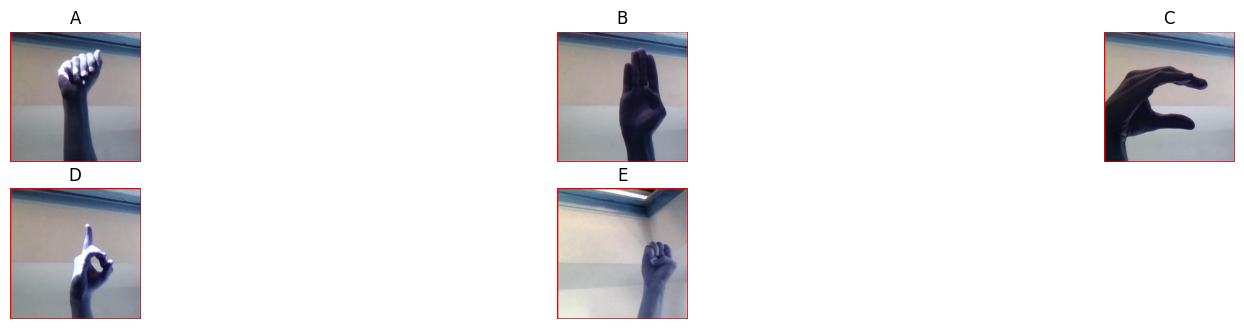

In [ ]:
unique,count = np.unique(y_train,return_counts=True)#displays images of each unique label
num_count = 1
plt.figure(figsize=(20,20))

#print an image of each unique label
for i in unique:
    plt.subplot(10,3,num_count)# 10 rows, 3 columns, and the current num_count as the index
    plt.imshow(x_train[np.where(y_train == np.array(i))[0][0]])#it uses np.where to find the indices of the images in x_train that have the current label. It then selects the first image from those indices and displays it using plt.imshow
    plt.axis('off')
    plt.title(classes[i])
    num_count += 1

Text(0.5, 1.0, 'Image count')

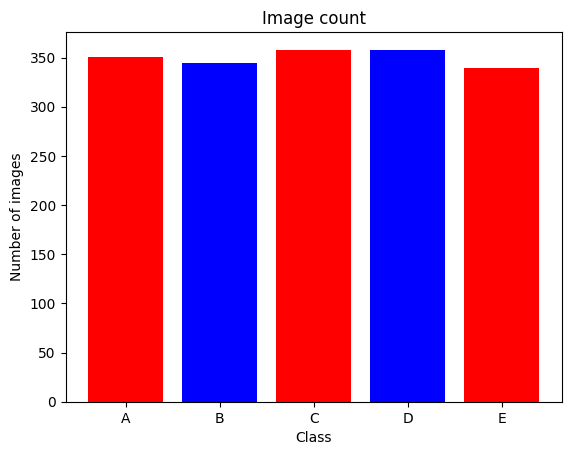

In [ ]:
plt.bar(unique, count, tick_label = classes, width = 0.8, color =['red', 'blue'])
#naming the x-axis
plt.xlabel('Class')
#naming the y-axis
plt.ylabel('Number of images')
#title
plt.title('Image count')

In [ ]:
total_count = sum(count)

for un in unique:
  print('Class: ', classes[un], 'Count: ', count[un], 'Mean Probability: ', count[un]/total_count)

Class:  A Count:  351 Mean Probability:  0.20057142857142857
Class:  B Count:  344 Mean Probability:  0.19657142857142856
Class:  C Count:  358 Mean Probability:  0.20457142857142857
Class:  D Count:  358 Mean Probability:  0.20457142857142857
Class:  E Count:  339 Mean Probability:  0.19371428571428573


In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
x_train = x_train/255
x_test = x_test/255

# **CNN Model Creation**

In [ ]:
cnn = keras.Sequential()

cnn.add(keras.layers.Conv2D(16,(3,3),activation="relu",padding="same",input_shape=(200,200,3)))
cnn.add(keras.layers.MaxPooling2D(3,3))

cnn.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same"))
cnn.add(keras.layers.MaxPooling2D(3,3))

cnn.add(keras.layers.Flatten())

cnn.add(keras.layers.Dense(29,activation="softmax"))

opt = keras.optimizers.Adam(learning_rate=0.001)
cnn.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=['accuracy'])
cnn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 200, 200, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 66, 66, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 66, 66, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 22, 22, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 15488)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 29)                  │         449,181 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 454,269 (1.73 MB)

 Trainable params: 454,269 (1.73 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
#start fitting our model @ 10 epochs
history = cnn.fit(x_train,
          y_train,
          epochs=10,
          validation_data = (x_test,y_test))

Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 52s 919ms/step - accuracy: 0.2546 - loss: 1.8054 - val_accuracy: 0.4160 - val_loss: 1.4065
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 50s 916ms/step - accuracy: 0.4634 - loss: 1.2906 - val_accuracy: 0.5800 - val_loss: 1.1106
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 86s 985ms/step - accuracy: 0.6547 - loss: 0.9448 - val_accuracy: 0.6333 - val_loss: 0.9650
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 77s 887ms/step - accuracy: 0.7558 - loss: 0.7251 - val_accuracy: 0.7200 - val_loss: 0.8195
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 83s 914ms/step - accuracy: 0.8503 - loss: 0.4928 - val_accuracy: 0.7653 - val_loss: 0.6852
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 82s 922ms/step - accuracy: 0.8791 - loss: 0.4033 - val_accuracy: 0.7773 - val_loss: 0.6472
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 48s 881ms/step - accuracy: 0.9114 - loss: 0.2998 - val_accuracy: 0.7987 - val_loss: 0.6062
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 81s 874ms/step - accuracy: 0.9302 - loss: 0.2237 - val_accu

In [ ]:
cnn.evaluate(x_test,y_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 319ms/step - accuracy: 0.8345 - loss: 0.5670


[0.5787950158119202, 0.8346666693687439]

# **Data Augmentation**

In [ ]:
!pip install keras-preprocessing==1.1.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.6 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import ImageDataGenerator from tensorflow.keras.preprocessing.image

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow(x_train, y_train, batch_size=32)

# **CNN Model Creation**


*   Dropout layer
*   Data Augmentation



In [ ]:


cnn = keras.Sequential()

cnn.add(keras.layers.Conv2D(16,(3,3),activation="relu",padding="same",input_shape=(200,200,3)))
cnn.add(keras.layers.MaxPooling2D(3,3))

cnn.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same"))
cnn.add(keras.layers.MaxPooling2D(3,3))

cnn.add(keras.layers.Flatten())


cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dropout(0.2))

cnn.add(keras.layers.Dense(29,activation="softmax"))

opt = keras.optimizers.Adam(learning_rate=0.001)
cnn.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=['accuracy'])
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 200, 200, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 66, 66, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 66, 66, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 22, 22, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 15488)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 15488)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15488)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 29)                  │         449,181 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 454,269 (1.73 MB)

 Trainable params: 454,269 (1.73 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = cnn.fit(train_generator, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


55/55 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.1640 - loss: 1.8329 - val_accuracy: 0.2773 - val_loss: 1.6015
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.2506 - loss: 1.6056 - val_accuracy: 0.2627 - val_loss: 1.5642
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.2958 - loss: 1.5460 - val_accuracy: 0.4360 - val_loss: 1.4419
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.3659 - loss: 1.4814 - val_accuracy: 0.4773 - val_loss: 1.3236
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.4088 - loss: 1.3891 - val_accuracy: 0.4600 - val_loss: 1.2445
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.4373 - loss: 1.2961 - val_accuracy: 0.5507 - val_loss: 1.1150
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.4475 - loss: 1.2798 - val_accuracy: 0.5667 - val_loss: 1.0749
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.4560 - loss: 1.2578 - val_accuracy: 0.5947 - val_loss: 1.0559
Epo

In [ ]:
cnn.evaluate(x_test,y_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 240ms/step - accuracy: 0.6334 - loss: 0.9459


[0.9761225581169128, 0.6133333444595337]

# **Object detection: Using YOLO**

In [ ]:
!pip install ultralytics==8.0.20

In [ ]:

from ultralytics import YOLO

model = YOLO('yolov8n.pt')

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:332: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu')  # load


In [ ]:
image=cv2.imread('/content/A1916.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

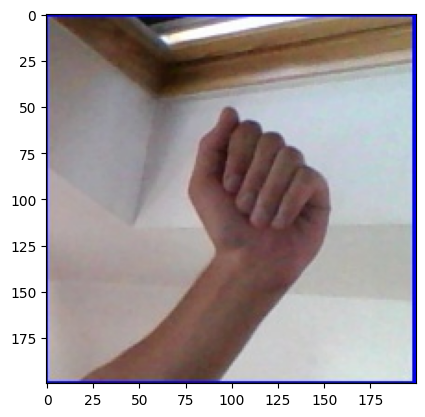

In [ ]:
# convert image to be 200x200 and flip then show the image

import matplotlib.pyplot as plt
image = cv2.resize(image, (200, 200))
image = cv2.flip(image, 1)  # Flip horizontally
plt.imshow(image)
plt.show()


In [ ]:
results = model.predict(source=image ,  show=True)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded


In [ ]:
# Assuming 'results' is the output from the YOLOv8 prediction
if len(results) > 0 and len(results[0].boxes) > 0:
  xmin = int(results[0].boxes[0].xyxy[0][0])
  ymin = int(results[0].boxes[0].xyxy[0][1])
  xmax = int(results[0].boxes[0].xyxy[0][2])
  ymax = int(results[0].boxes[0].xyxy[0][3])

  cropped_img = results[0].orig_img[ymin:ymax, xmin:xmax]

  resized_img = cv2.resize(cropped_img, (200, 200))
  reshaped_img = np.reshape(resized_img, [1, 200, 200, 3])

  prediction = model.predict(reshaped_img)
  predicted_class = classes[np.argmax(prediction)]

  print("Predicted letter:", predicted_class)

NameError: name 'results' is not defined